In [2]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = ""  
    
    # traverse in the string   
    for ele in s:  
        str1 += ele   
    
    # return string   
    return str1

def extract_face(pixels, required_size=(32, 32)):
#     # load image from file
#     image = Image.open(filename)
#     # convert to RGB, if needed
#     image = image.convert('RGB')
    # convert to array
#     pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    print('1')
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # deal with negative pixel index
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array


In [3]:
pip install mtcnn

     |████████████████████████████████| 2.3 MB 883 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # opencv
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from keras.models import load_model
from PIL import Image
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import glob
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
import os
from PIL import Image
from keras.models import load_model
import tensorflow as tf
from time import time
import logging


In [5]:
attributes = pd.read_csv('https://www.cs.columbia.edu/CAVE/databases/pubfig/download/lfw_attributes.txt')
# coloumns = list(listToString(np.array(attributes)).split('\t'))
# classes = coloumns[1:]
values = []
for i in range(1, len(attributes)):
    values.append(list(listToString(np.array(attributes)[i]).split('\t')))
value = np.array(values)

In [6]:
value[:,2].astype(float)

array([ 1.56834639,  0.16985062,  0.99774898, ..., -0.03700128,
        0.28221859,  0.0711971 ])

In [7]:
for i in list(np.array(pd.read_csv('https://www.cs.columbia.edu/CAVE/databases/pubfig/download/lfw_attributes.txt'))[0]):
    print(i.split('\t')[1:])

['person', 'imagenum', 'Male', 'Asian', 'White', 'Black', 'Baby', 'Child', 'Youth', 'Middle Aged', 'Senior', 'Black Hair', 'Blond Hair', 'Brown Hair', 'Bald', 'No Eyewear', 'Eyeglasses', 'Sunglasses', 'Mustache', 'Smiling', 'Frowning', 'Chubby', 'Blurry', 'Harsh Lighting', 'Flash', 'Soft Lighting', 'Outdoor', 'Curly Hair', 'Wavy Hair', 'Straight Hair', 'Receding Hairline', 'Bangs', 'Sideburns', 'Fully Visible Forehead', 'Partially Visible Forehead', 'Obstructed Forehead', 'Bushy Eyebrows', 'Arched Eyebrows', 'Narrow Eyes', 'Eyes Open', 'Big Nose', 'Pointy Nose', 'Big Lips', 'Mouth Closed', 'Mouth Slightly Open', 'Mouth Wide Open', 'Teeth Not Visible', 'No Beard', 'Goatee', 'Round Jaw', 'Double Chin', 'Wearing Hat', 'Oval Face', 'Square Face', 'Round Face', 'Color Photo', 'Posed Photo', 'Attractive Man', 'Attractive Woman', 'Indian', 'Gray Hair', 'Bags Under Eyes', 'Heavy Makeup', 'Rosy Cheeks', 'Shiny Skin', 'Pale Skin', "5 o' Clock Shadow", 'Strong Nose-Mouth Lines', 'Wearing Lipstick

In [8]:
for i in range(value.shape[0]):
    try:
        value[i,0] = ('_'.join([value[i,0].split(' ')[0],value[i,0].split(' ')[1]]))
    except:
        pass
pd.DataFrame(value)


,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,Aaron_Eckhart,1,1.56834639173,-1.88904271738,1.73720324618,-0.929728671614,-1.4717994909,-0.195580416696,-0.835609388667,-0.351468332141,...,0.361737685257,1.16611821063,-1.16491625494,-1.13999038432,-2.37174572455,-1.29993198905,-0.414681760268,-1.1449020909,0.694007237055,-0.826608788807
1,Aaron_Guiel,1,0.169850615079,-0.9824078298,0.422709344724,-1.28218444066,-1.36005999796,-0.867001510546,-0.45229265405,-0.197520738279,...,-0.832036380098,-0.397680027246,0.874160103001,-0.945431057978,-0.268648623951,-0.00624408064799,-0.0304056925377,-0.480128381674,0.666759772228,-0.496558800435
2,Aaron_Patterson,1,0.997748978625,-1.36419463748,-0.157376927297,-0.756447251994,-1.89182505036,-0.87152602607,-0.862893308853,0.0314446531456,...,1.54974268112,1.88474515371,-0.999765023736,-1.3598581042,-1.91210796401,-1.09563421851,0.915125965207,-0.572332382954,0.144261972973,-0.84123127649
3,Aaron_Peirsol,1,1.12271853446,-1.99779909564,1.91614437179,-2.51421429402,-2.58007139867,-1.40423935631,0.057551079477,0.000195881567807,...,0.567822023847,-0.176088957461,1.10812479108,-1.60094409268,-3.26461275672,0.813418335935,0.30863081628,-0.848693270575,0.475941175723,-0.447025051151
4,Aaron_Peirsol,2,1.07821423781,-2.00809831161,1.67621103655,-2.2780559446,-2.65184543714,-1.34840776272,0.649089348664,0.0176564027753,...,-1.46147431539,-0.955282684761,0.119113361315,-1.12817571921,-3.16104814248,0.0826804119045,-0.439613851533,-0.359859014792,-0.760773908824,-0.410151910322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13138,Zorica_Radovic,1,-0.205362658077,-0.202841582358,-1.23273524755,-1.40912547223,-1.80485762625,0.287268252645,-0.52181547044,-0.789165125245,...,-0.867155808795,-0.879553847274,-0.17949686177,0.323676457429,-2.18885245596,-1.16936927284,0.924397481566,-0.217415477004,-0.414023807227,-0.495177994004
13139,Zulfiqar_Ahmed,1,1.95747206848,-2.47247027588,-1.307994302,-0.671635859568,-1.96012484202,-0.838802872905,-1.36595516036,0.510447793429,...,-2.48728925884,2.60886077639,-0.954189535922,-1.59946266817,-1.23822019395,-1.18703409376,1.87413037158,-0.832613902925,0.152785085499,-0.5543308651
13140,Zumrati_Juma,1,-0.0370012807044,-1.16415027206,0.228494327488,0.187503489496,-1.83647487508,-0.958412082362,-0.669697452219,-0.48033033842,...,-1.93863892824,-0.491079845364,0.495066523487,-0.524767351176,-1.07373125753,0.111009816202,0.976262267176,-0.453027446355,-0.399980772831,-1.07865536736
13141,Zurab_Tsereteli,1,0.282218589215,-0.396197953672,1.27046964068,-1.98120890515,-1.70294029255,-1.50720268984,-2.33072096646,-0.295928188291,...,-0.662101301458,-1.69213111979,1.28477156643,-0.808180036017,-0.710050505272,0.694620638489,0.936064772628,-0.767499702594,1.14692991384,-0.260940415025


In [9]:
import cv2
from skimage import data
from skimage.color import rgb2gray

lbl = []
data = []
# count = 1

for i in glob.glob('../input/lfwa-dataset/lfw2/lfw2/*/*.jpg'):
    lbl.append('_'.join([i.split('/')[-1].split('_')[0],i.split('/')[-1].split('_')[1]]))
#     lbl('_'.join([i.split('/')[-1].split('_')[0],i.split('/')[-1].split('_')[1]]))
    lbl.append(int(i.split('/')[-1].split('.')[0].split('_')[-1]))
#     lbl('_'.join([i.split('/')[-1].split('_')[0],i.split('/')[-1].split('_')[1]]))
    a = cv2.resize(plt.imread(i),(75,75))
    a = cv2.cvtColor(a,cv2.COLOR_GRAY2RGB)
    data.append(a)
#     print(count)
#     count+=1
    
label = np.array(lbl).reshape((-1,2))
data = np.array(data)

In [10]:
X = []
Y = []
# count = 1
for j in range(label.shape[0]):
    for i in range(value.shape[0]): 
        if (label[j,0] == value[i,0]) and (label[j,1] == value[i,1]):
            X.append(data[j])
            Y.append(value[i,2:])
#             print(count)
#             count+=1
X = np.array(X)
Y = np.array(Y)


In [11]:
# a = np.zeros((np.array(df)[:,2:].shape))
# b = np.array(df)[:,2:]
for i in range(Y.shape[0]):
    for j in range(Y.shape[1]):
        if np.float(Y[i,j])>0:
            Y[i,j] = int(1)
        else:
            Y[i,j] = int(0)
Y = Y.astype(int)
Y_1 = np.copy(Y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,Y_1 , test_size=0.25, random_state=42)
X_train.shape,y_test.shape,y_train.shape, X_test.shape

((9870, 75, 75, 3), (3290, 73), (9870, 73), (3290, 75, 75, 3))

In [13]:
base_model = tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=74,
    classifier_activation="softmax",
)

87916544/87910968 [==============================] - 3s 0us/step


In [14]:
# base_model = tf.keras.applications.VGG16( include_top = False, input_shape = (75,75,3))
for layer in base_model.layers[:-1]:
  layer.trainable = True
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(8192, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
# x = tf.keras.layers.Dense(2048, activation='relu')(x)
# x = tf.keras.layers.Dense(1024, activation='relu')(x)
# x = tf.keras.layers.Dense(512, activation='relu')(x)
# x = tf.keras.layers.Dense(512, activation='relu')(x)
# x = tf.keras.layers.Dense(256, activation='relu')(x)
preds = tf.keras.layers.Dense(73, activation='relu')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=preds)
print(model.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
_______________________________________________________________________________________

Epoch 1/40
309/309 [==============================] - 16s 53ms/step - loss: 153.8187 - accuracy: 0.0319
Epoch 2/40
309/309 [==============================] - 16s 51ms/step - loss: 152.9647 - accuracy: 0.1775
Epoch 3/40
309/309 [==============================] - 16s 51ms/step - loss: 152.9187 - accuracy: 0.1537
Epoch 4/40
309/309 [==============================] - 15s 50ms/step - loss: 152.6755 - accuracy: 0.2411
Epoch 5/40
309/309 [==============================] - 16s 50ms/step - loss: 152.3897 - accuracy: 0.3326
Epoch 6/40
309/309 [==============================] - 16s 51ms/step - loss: 152.8707 - accuracy: 0.1897
Epoch 7/40
309/309 [==============================] - 16s 51ms/step - loss: 152.5953 - accuracy: 0.1024
Epoch 8/40
309/309 [==============================] - 15s 50ms/step - loss: 153.0058 - accuracy: 0.1716
Epoch 9/40
309/309 [==============================] - 16s 51ms/step - loss: 152.4306 - accuracy: 0.1067
Epoch 10/40
309/309 [==============================] - 15s 50ms/

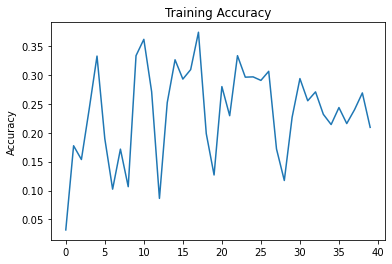

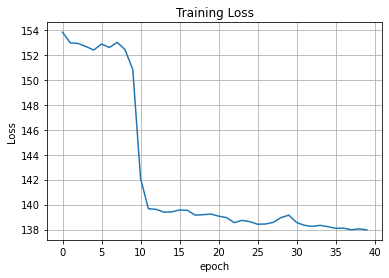

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs = 40, batch_size =32)


# predictions = lb.inverse_transform(pred)
# y_true = lb.inverse_transform(y_test)
y_true = y_test
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure()
plt.plot(acc, label='Training Accuracy')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.figure()

plt.plot(loss, label='Training Loss')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xlabel('epoch')
plt.grid()
plt.show()


In [16]:
from keras.models import model_from_json

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [17]:
from keras.models import model_from_json

json_file = open('/kaggle/working/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/kaggle/working/model.h5")
print("Loaded model from disk")

Loaded model from disk


## Person : Male

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
_______________________________________________________________________________________

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
_______________________________________________________________________________________

__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, None, None, 6 18432       mixed1[0][0]                     
__________________________________________________________________________________________________
batch_normalization_22 (BatchNo (None, None, None, 6 192         conv2d_22[0][0]                  
__________________________________________________________________________________________________
activation_22 (Activation)      (None, None, None, 6 0           batch_normalization_22[0][0]     
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, None, None, 4 13824       mixed1[0][0]                     
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, None, None, 9 55296       activation_22[0][0]              
__________

Epoch 1/10
309/309 [==============================] - 6s 19ms/step - loss: 0.0000e+00 - accuracy: 0.7742
Epoch 2/10
309/309 [==============================] - 6s 18ms/step - loss: 0.0000e+00 - accuracy: 0.7742
Epoch 3/10
309/309 [==============================] - 6s 18ms/step - loss: 0.0000e+00 - accuracy: 0.7742
Epoch 4/10
309/309 [==============================] - 6s 19ms/step - loss: 0.0000e+00 - accuracy: 0.7742
Epoch 5/10
309/309 [==============================] - 6s 18ms/step - loss: 0.0000e+00 - accuracy: 0.7742
Epoch 6/10
309/309 [==============================] - 6s 18ms/step - loss: 0.0000e+00 - accuracy: 0.7742
Epoch 7/10
309/309 [==============================] - 6s 18ms/step - loss: 0.0000e+00 - accuracy: 0.7742
Epoch 8/10
309/309 [==============================] - 6s 19ms/step - loss: 0.0000e+00 - accuracy: 0.7742
Epoch 9/10
309/309 [==============================] - 6s 19ms/step - loss: 0.0000e+00 - accuracy: 0.7742
Epoch 10/10
309/309 [==============================] - 

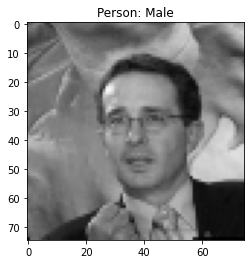

In [18]:
for layer in model.layers[:-1]:
  layer.trainable = False
x = model.output
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
preds = tf.keras.layers.Dense(1, activation='softmax')(x)
model_gender = tf.keras.models.Model(inputs=model.input, outputs=preds)
print(model_gender.summary())


x = model.output
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
preds = tf.keras.layers.Dense(1, activation='softmax')(x)
model_gender = tf.keras.models.Model(inputs=model.input, outputs=preds)
print(model_gender.summary())

model_gender.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_gender.fit(X_train,y_train[:,0].reshape((-1,1)), epochs = 10, batch_size =32)

pred_gender = model_gender.predict(X_test)



In [ ]:
from sklearn.metrics import accuracy_score

print("{}".format(accuracy_score(y_test[:,0].reshape((-1,1)),pred_gender)*100))

plt.imshow(X_test[100]),
if (model_gender.predict(np.expand_dims(X_test[100],axis = 0)) ==1):
    plt.title('Person: Male')

## Person : Eyeglasses

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
_______________________________________________________________________________________

activation_46 (Activation)      (None, None, None, 1 0           batch_normalization_46[0][0]     
__________________________________________________________________________________________________
conv2d_42 (Conv2D)              (None, None, None, 1 179200      activation_41[0][0]              
__________________________________________________________________________________________________
conv2d_47 (Conv2D)              (None, None, None, 1 179200      activation_46[0][0]              
__________________________________________________________________________________________________
batch_normalization_42 (BatchNo (None, None, None, 1 480         conv2d_42[0][0]                  
__________________________________________________________________________________________________
batch_normalization_47 (BatchNo (None, None, None, 1 480         conv2d_47[0][0]                  
__________________________________________________________________________________________________
activation

Epoch 1/10
309/309 [==============================] - 6s 18ms/step - loss: 0.0000e+00 - accuracy: 0.1756
Epoch 2/10
309/309 [==============================] - 6s 18ms/step - loss: 0.0000e+00 - accuracy: 0.1756
Epoch 3/10
309/309 [==============================] - 6s 18ms/step - loss: 0.0000e+00 - accuracy: 0.1756
Epoch 4/10
309/309 [==============================] - 6s 19ms/step - loss: 0.0000e+00 - accuracy: 0.1756
Epoch 5/10
309/309 [==============================] - 6s 18ms/step - loss: 0.0000e+00 - accuracy: 0.1756
Epoch 6/10
309/309 [==============================] - 6s 18ms/step - loss: 0.0000e+00 - accuracy: 0.1756
Epoch 7/10
309/309 [==============================] - 6s 20ms/step - loss: 0.0000e+00 - accuracy: 0.1756
Epoch 8/10
309/309 [==============================] - 6s 18ms/step - loss: 0.0000e+00 - accuracy: 0.1756
Epoch 9/10
309/309 [==============================] - 6s 19ms/step - loss: 0.0000e+00 - accuracy: 0.1756
Epoch 10/10
309/309 [==============================] - 

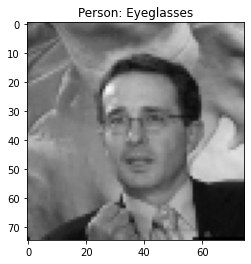

In [19]:
for layer in model.layers[:-1]:
  layer.trainable = False
x = model.output
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
preds = tf.keras.layers.Dense(1, activation='softmax')(x)
model_eyeglasses = tf.keras.models.Model(inputs=model.input, outputs=preds)
print(model_eyeglasses.summary())


x = model.output
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
preds = tf.keras.layers.Dense(1, activation='softmax')(x)
model_eyeglasses = tf.keras.models.Model(inputs=model.input, outputs=preds)
print(model_eyeglasses.summary())

model_eyeglasses.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_eyeglasses.fit(X_train,y_train[:,14].reshape((-1,1)), epochs = 10, batch_size =32)

pred_eyeglasses = model_eyeglasses.predict(X_test)

17.477203647416413


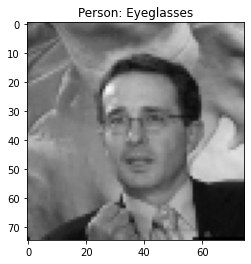

In [24]:
from sklearn.metrics import accuracy_score

print("{}".format(accuracy_score(y_test[:,14].reshape((-1,1)),pred_eyeglasses)*100))

plt.imshow(X_test[100]),
if (model_eyeglasses.predict(np.expand_dims(X_test[100],axis = 0)) ==1):
    plt.title('Person: Eyeglasses')


## Person : Black Hair

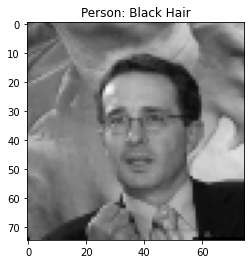

In [21]:
for layer in model.layers[:-1]:
  layer.trainable = False
x = model.output
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
preds = tf.keras.layers.Dense(1, activation='softmax')(x)
model_black_hair = tf.keras.models.Model(inputs=model.input, outputs=preds)
print(model_black_hair.summary())




model_black_hair.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_black_hair.fit(X_train,y_train[:,9].reshape((-1,1)), epochs = 10, batch_size =32)

pred_gender = model_black_hair.predict(X_test)



13.282674772036474


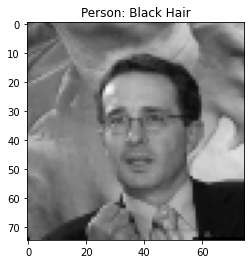

In [22]:
from sklearn.metrics import accuracy_score

print("{}".format(accuracy_score(y_test[:,9].reshape((-1,1)),pred_gender)*100))

plt.imshow(X_test[100]),
if (model_black_hair.predict(np.expand_dims(X_test[100],axis = 0)) ==1):
    plt.title('Person: Black Hair')